In [1]:
%load_ext autoreload
%autoreload 2
#import os
import DriftMLP
import networkx as nx
import os
file = os.environ['DRIFTFILE']
drift_kwargs = {'variables':['position','drogue', 'datetime'], 'drop_na':False, 'drogue':True}
day_cut_off=5
silent = False
network = DriftMLP.file_to_network(file, drift_kwargs, day_cut_off=5)
#drift_gen = DriftMLP.driftiter.generator(file)
#h3_stories=DriftMLP.story.get_story(drift_gen(**drift_kwargs))
#nx.write_gml(network, 'transition.gml')
## OR
#mlp_class = DriftMLP.MLP(file)
#nx.write_gml(mlp_class.net, 'transition.gml')

##
#mlp_class = DriftMLP.MLP('transition.gml')


In [124]:
from DriftMLP import shortest_path
sp_r = shortest_path.single_SP(network, [-23,17], [-48,44])
sp_crossequator = shortest_path.single_SP(network, [-23,-18], [-48,44])
sp_r.plot_folium()
network.vs[0]

igraph.Vertex(<igraph.Graph object at 0x7f199ab59b80>, 0, {'name': 590995677547331583, 'inN': 1400.0, 'outN': 1360.0})

### Folium Plotting

In [125]:
sp_r.plot_folium()

# Plotting with Catopy
In the package theres a basic class around the shortest path objects which can produce cartopy plots. 
This is usefil tool for quick plotting and you can 

(<Figure size 1440x1440 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f1995adbeb0>)

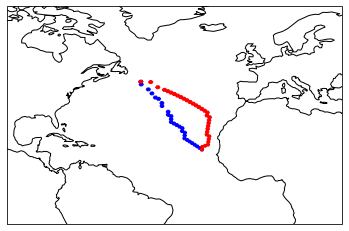

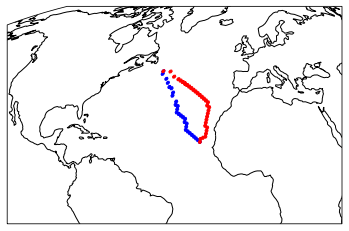

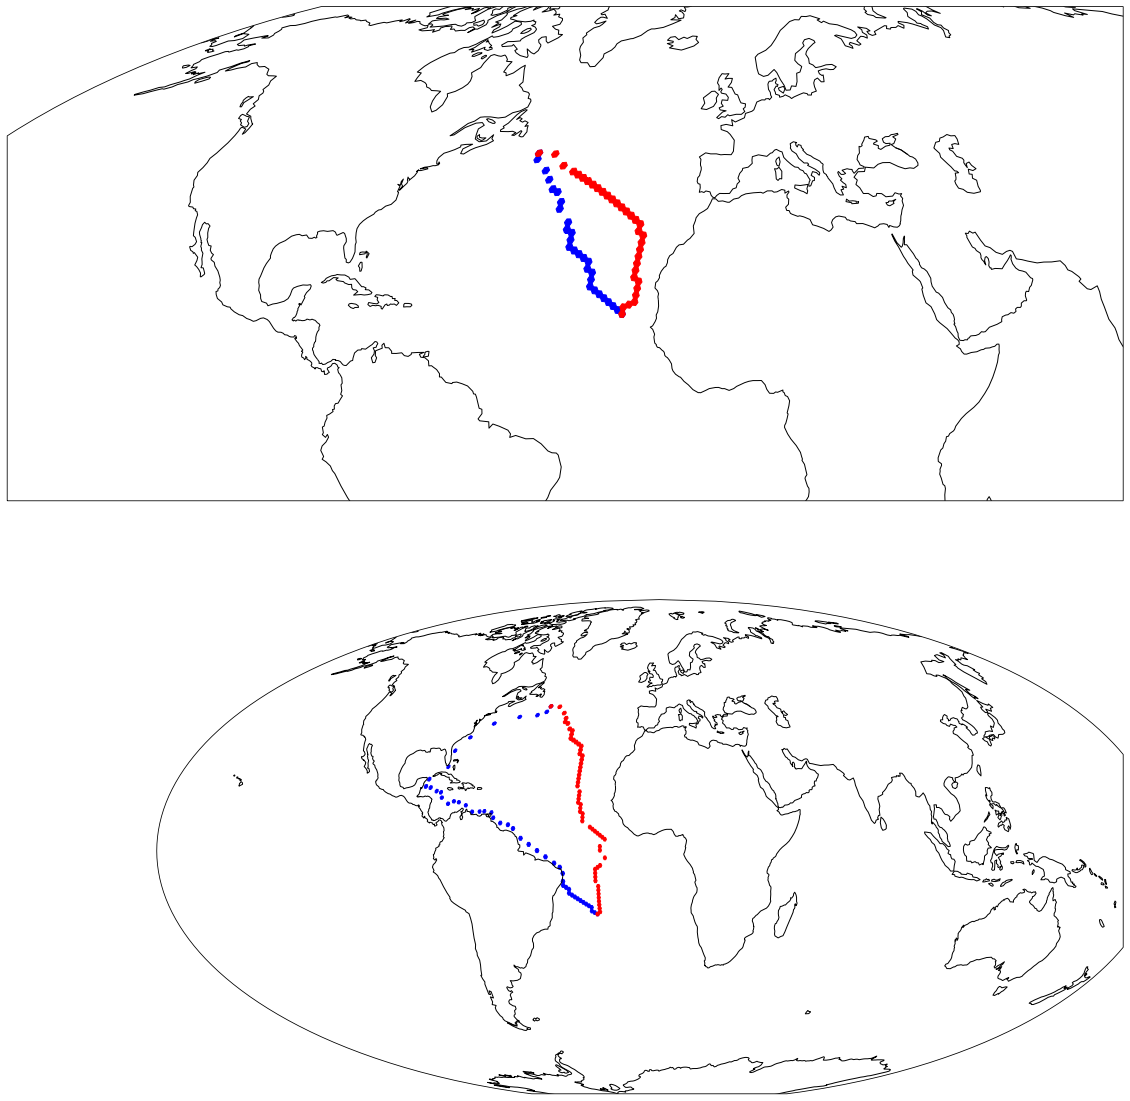

In [126]:
### Default plotting doesn't have many customisable options
fig, ax = sp_r.plot_cartopy()
## Can play around with projection and axis/figure settings
fig_mollweide = plt.figure()
ax_mollweide = plt.subplot(projection=ccrs.Mollweide())
sp_r.plot_cartopy(ax=ax_mollweide)


###Could also stack figures if necessary
plt.figure(figsize=[20,20])
ax_upper = plt.subplot(2,1,1, projection=ccrs.Mollweide())
ax_lower = plt.subplot(2,1,2, projection=ccrs.Mollweide())
sp_r.plot_cartopy(ax=ax_upper)
sp_crossequator.plot_cartopy(ax=ax_lower)


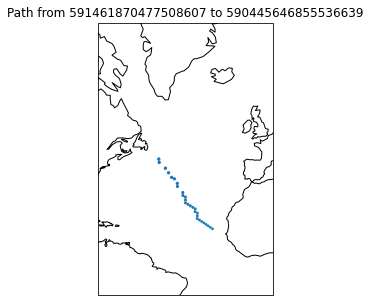

In [127]:
from DriftMLP.plotting import h3_cartopy, make_h3_gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(projection=ccrs.Mercator())
#fig, ax = h3_cartopy.default_figure(fig)
plot_hexes = sp_r.sp.h3id
ax.coastlines()
h3_gpd = make_h3_gpd.network_to_multipolygon_df(network)
h3_cartopy.plot_hex(h3_gpd, sp_r.sp.h3id, ax=ax, set_extent=True)
ax.set_title(sp_r.sp.titlestring)
display(ax)

Cartopy won't fill the axis that often, there are two easy fixes for this

1. Stretch out the figure

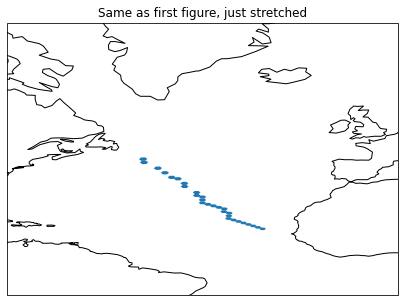

In [88]:
ax.set_aspect('auto')
ax.set_title('Same as first figure, just stretched')
display(fig)



2. Change the data limit to fill the space.

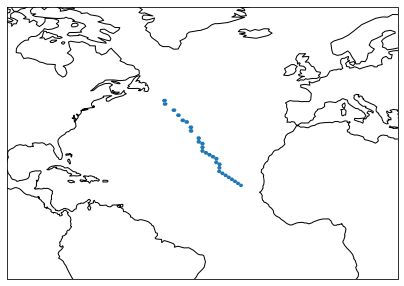

In [76]:
## Undo the auto aspect
ax.set_aspect('equal')
##This will change the axis to make it fill the space.
ax.set_adjustable('datalim')
display(fig)

In [128]:
sp_r

From: [-23, 17], To: [-48, 44]
Travel time for the forward journey(blue)
2374.4544319901806
Travel time for the return joorney(red)
1181.0718731171216

## DO THIS NOW

In [129]:
from DriftMLP import rotations
from DriftMLP.rotations import random_ll_rot
rot_class = random_ll_rot()
rot_class(0,0)

(0.0, 0.0)

From: [-15, 54], To: [-80, 28]
Travel time for the forward journey(blue)
3344.09099154879
Travel time for the return joorney(red)
730.7446820025156

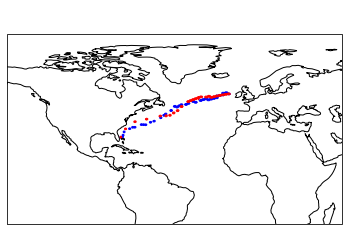

In [136]:
ireland = [-15, 54]
miami = [-80, 28]

sp_ie_to_miami = shortest_path.single_SP(network, ireland, miami)
sp_ie_to_miami.plot_cartopy()
sp_ie_to_miami

## Rotations

In [ ]:
from DriftMLP.rotations import random_ll_rot
random_ll_rot